# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2023

Мягий дедлайн: 23:59 12.12.2023

Жестокий дедлайн: 23:59 14.12.2023

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/56884/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

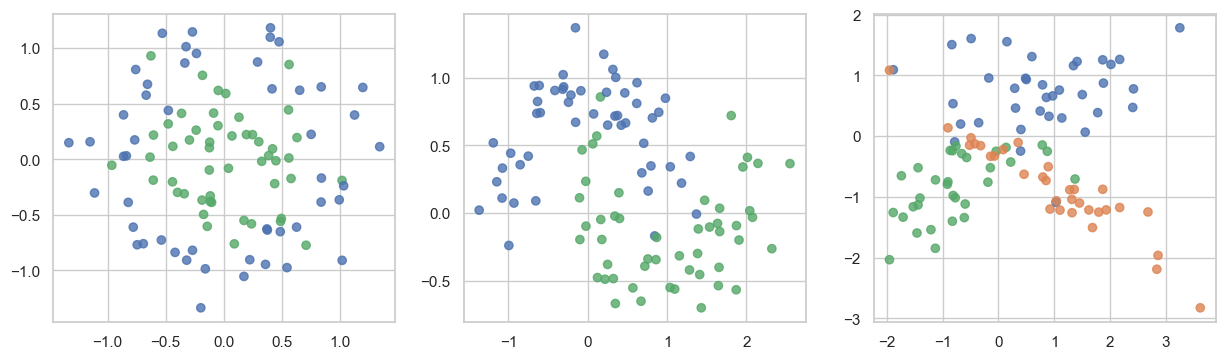

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [11]:
def plot_surface(clf, X, y, title=None):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)
    plt.title(title)
    plt.xlabel("feature_1")
    plt.ylabel("feature_2")

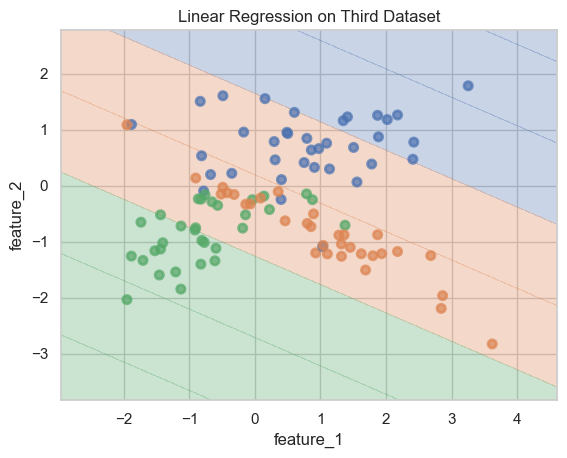

In [12]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y, title="Linear Regression on Third Dataset")

In [13]:
from sklearn.tree import DecisionTreeClassifier

- **Первый датасет (создан через `make_circles`):**

In [14]:
X_train, X_test, y_train, y_test = train_test_split(datasets[0][0], datasets[0][1], test_size=0.3, random_state=42)

In [15]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

**Изобразим разделяющую поверхность и найдём accuracy на трейне:**

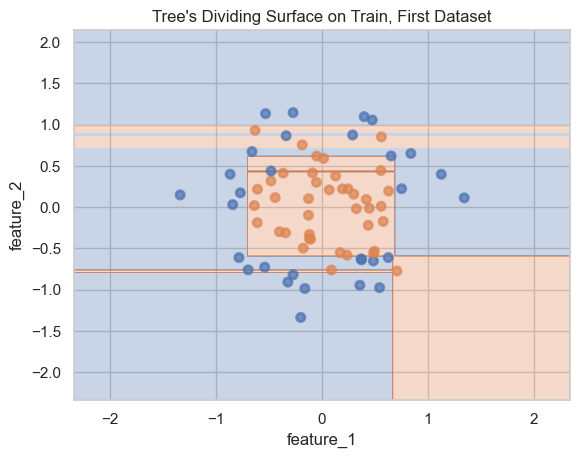

In [16]:
plot_surface(tree, X_train, y_train, title="Tree's Dividing Surface on Train, First Dataset")

In [17]:
print("Accuracy:", tree.score(X_train, y_train)) # tree.score() вычисляет mean accuracy (среднее - по классам, то есть в случае бинарной классификации получим просто accuracy)

Accuracy: 1.0


**Изобразим разделяющую поверхность и найдём accuracy на тесте:**

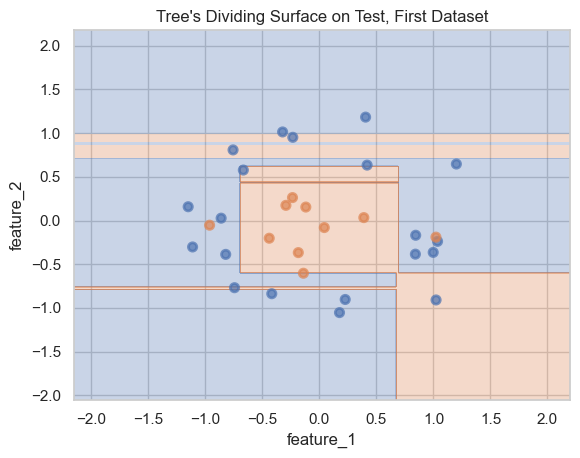

In [18]:
plot_surface(tree, X_test, y_test, title="Tree's Dividing Surface on Test, First Dataset")

In [22]:
print("Accuracy:", tree.score(X_test, y_test))

Accuracy: 0.7333333333333333


- **Второй датасет (создан через `make_moons`):**

**Разобьём выборку на трейн и на тест:**

In [23]:
X_train, X_test, y_train, y_test = train_test_split(datasets[1][0], datasets[1][1], test_size=0.3, random_state=42)

In [24]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

**Изобразим разделяющую поверхность и найдём accuracy на трейне:**

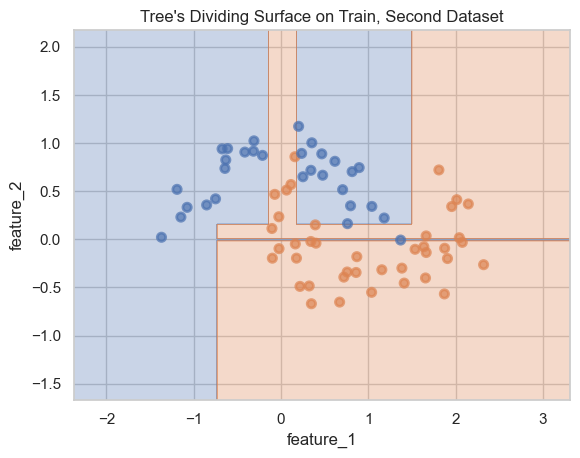

In [25]:
plot_surface(tree, X_train, y_train, title="Tree's Dividing Surface on Train, Second Dataset")

Accuracy:

In [26]:
print("Accuracy:", tree.score(X_train, y_train))

Accuracy: 1.0


**Изобразим разделяющую поверхность и найдём accuracy на тесте:**

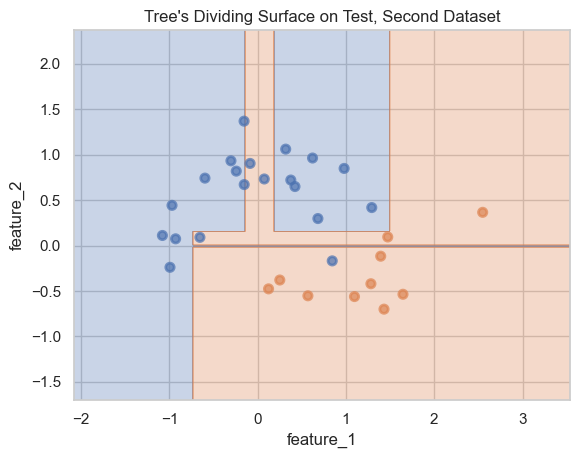

In [27]:
plot_surface(tree, X_test, y_test, title="Tree's Dividing Surface on Test, Second Dataset")

In [28]:
print("Accuracy:", tree.score(X_test, y_test))

Accuracy: 0.8666666666666667


- **Третий датасет (создан через `make_classification`):**

In [29]:
X_train, X_test, y_train, y_test = train_test_split(datasets[2][0], datasets[2][1], test_size=0.3, random_state=42)

In [30]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

**Изобразим разделяющую поверхность и найдём accuracy (здесь уже ищем mean accuracy, так как классов - 3) на трейне:**

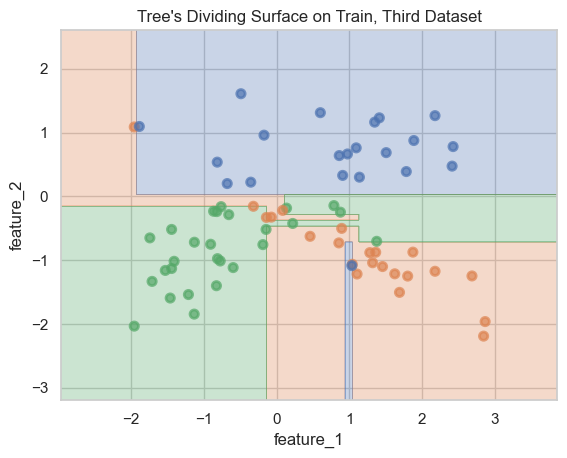

In [31]:
plot_surface(tree, X_train, y_train, title="Tree's Dividing Surface on Train, Third Dataset")

In [32]:
print("Accuracy:", tree.score(X_train, y_train))

Accuracy: 1.0


**Изобразим разделяющую поверхность и найдём accuracy (или, если быть точнее, mean accuracy) на тесте:**

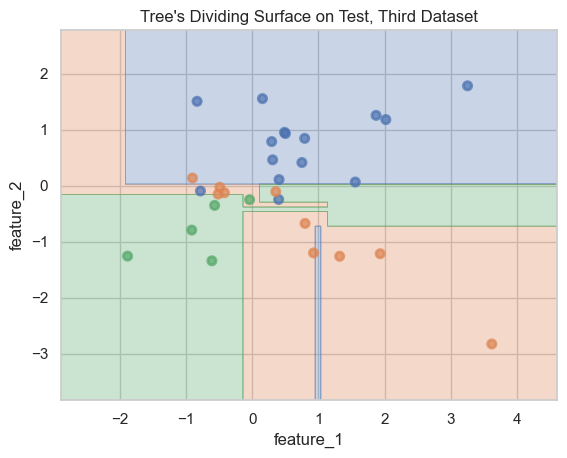

In [33]:
plot_surface(tree, X_test, y_test, title="Tree's Dividing Surface on Test, Third Dataset")

In [34]:
print("Accuracy:", tree.score(X_test, y_test))

Accuracy: 0.8333333333333334


__Ответ:__ Из графиков выше, а также из значений accuracy, видно, что деревья заметно переобучились на каждом из датасетов:
 - так, можно видеть, что разделяющая поверхность не обобщает своими разделами пространства объекты выборки, но иногда выделяет очень узкие области, чтобы "подогнаться" под какой-то один конкретный объект, или вообще пустые области. Это является признаком переобучения этих деревьев.

 - также значения accuracy на тесте значительно меньше, чем на трейне (где из-за отсутствия какой-либо регуляризации в дефолтном дереве (нет ограничений ни по глубине, ни по кол-ву листьев, ни по кол-ву элементов в листе и т.д.) accuracy всегда будет равным 1, то есть деревья будут идеально подгоняться под трейн). Это также означает, что деревья переобучились.

**Замечание:** Стоит обратить внимание на то, что наши датасеты достаточно малы - всего по 100 объектов в каждом => хотя значения accuracy при переходе от трейна к тесту сильно уменьшаются, они не уменьшаются настолько сильно, насколько могли бы на ещё бОльших датасетах.  

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

**Будем рассматривать следующие гиперпараметры для регуляризации:**

- `max_depth` (ограничивает, как следует из названия, глубину дерева; очевидно, что чем меньше глубина дерева, тем менее оно будет переобученным)

- `min_samples_split` (минимальное число элементов исходной выборки в подвыборке в ноде, необходимое для её split'а; если в ноде кол-во элементов меньше, чем `min_samples_split`, то эта нода больше не делится и становится листом; чем больше `min_samples_split`, тем более близкие к корню дерева ноды будут становиться листьями, что будет делать это дерево менее переобученным)

- `min_samples_leaf` (минимальное число элементов исходной выборки в подвыборке в листе; этот гиперпараметр фактически обеспечивает, что в дереве в каждом листе не может быть меньше, чем `min_samples_leaf` элементов; чем больше `min_samples_leaf`, тем более близкие к корню дерева ноды должны будут стать листьями, что сделает это дерево менее переобученным)

Напишем **вспомогательные функции**, чтобы было проще проводить эксперименты с массивами значений гиперпараметров:

In [35]:
def plot_surface(clf, X, y, ax, title=None):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

    ax.set_title(title)
    ax.set_xlabel("feature_1")
    ax.set_ylabel("feature_2")


def plot_surfaces_train_test(clf, X_train, y_train, X_test, y_test, ax, ax_row, clf_hyperparam_info, dataset_num):
    datasets_dict = {0: "First", 1: "Second", 2: "Third"}
    full_title_train = "Tree's Dividing Surface on Train, {0} Dataset \n {1}; accuracy: {2}".format(datasets_dict[dataset_num], clf_hyperparam_info, clf.score(X_train, y_train))
    plot_surface(clf, X_train, y_train, ax[ax_row][0], title=full_title_train)
    full_title_test = "Tree's Dividing Surface on Test, {0} Dataset \n {1}; accuracy: {2}".format(datasets_dict[dataset_num], clf_hyperparam_info, clf.score(X_test, y_test))
    plot_surface(clf, X_test, y_test, ax[ax_row][1], title=full_title_test)


def plot_surfaces_by_hyperparameter_arr(dataset, dataset_num, hyperparam, hyperparam_vals):
    X_train, X_test, y_train, y_test = train_test_split(dataset[0], dataset[1], test_size=0.3, random_state=42)
    fig, ax = plt.subplots(len(hyperparam_vals), 2, figsize=(14, 7 * len(hyperparam_vals)))

    for ind, hyperparam_val in enumerate(hyperparam_vals):
        if hyperparam == "max_depth":
            tree = DecisionTreeClassifier(random_state=42, max_depth=hyperparam_val)
        elif hyperparam == "min_samples_split":
            tree = DecisionTreeClassifier(random_state=42, min_samples_split=hyperparam_val)
        elif hyperparam == "min_samples_leaf":
            tree = DecisionTreeClassifier(random_state=42, min_samples_leaf=hyperparam_val)
        tree.fit(X_train, y_train)
        plot_surfaces_train_test(tree, X_train, y_train, X_test, y_test, ax, ind, "{0}: {1}".format(hyperparam, hyperparam_val), dataset_num)

    fig.tight_layout(h_pad=3, w_pad=3)
    plt.show()

**Проведем эксперименты:**
- `max_depth`:
Будем рассматривать значения max_depth от 2 до 9 (значение 1 смотреть смысла нет, так как это означает, что вообще не делаем split'ы; значения максимальной глубины, равные 9 и больше, скорее всего приведут к тому, что дерево будет сильно переобученным, так что дальше, чем `max_depth == 9`, смысла смотреть нет):

In [36]:
max_depth_vals = np.arange(2, 10)

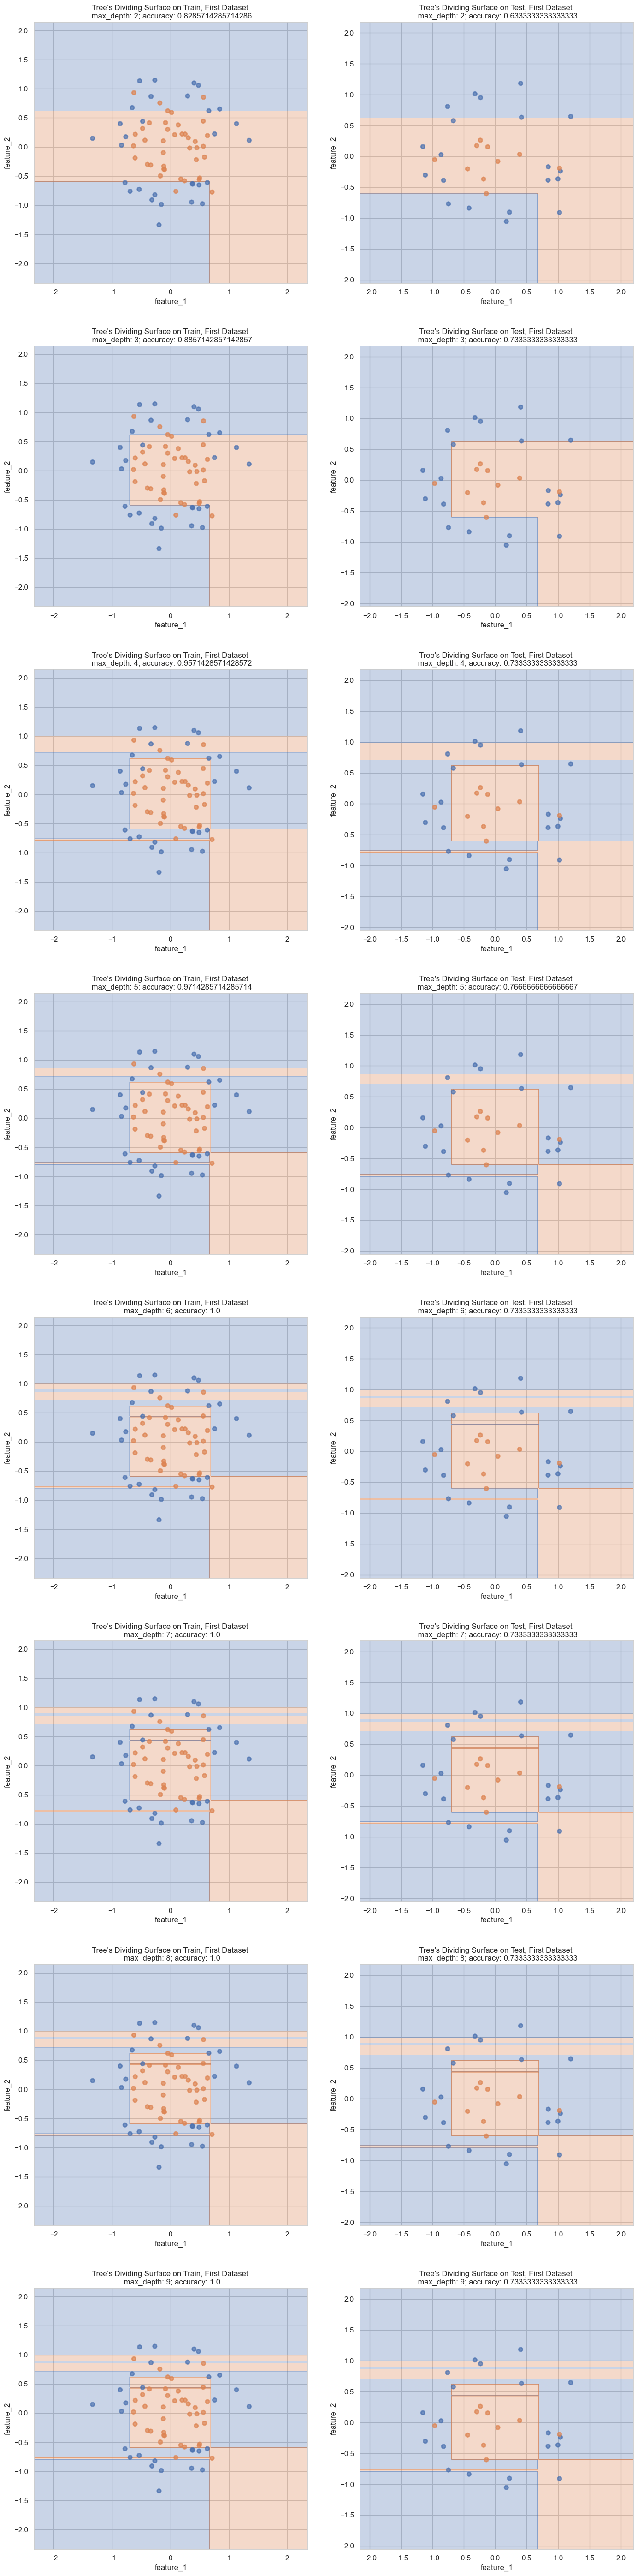

In [37]:
plot_surfaces_by_hyperparameter_arr(datasets[0], 0, "max_depth", max_depth_vals) #1 dataset

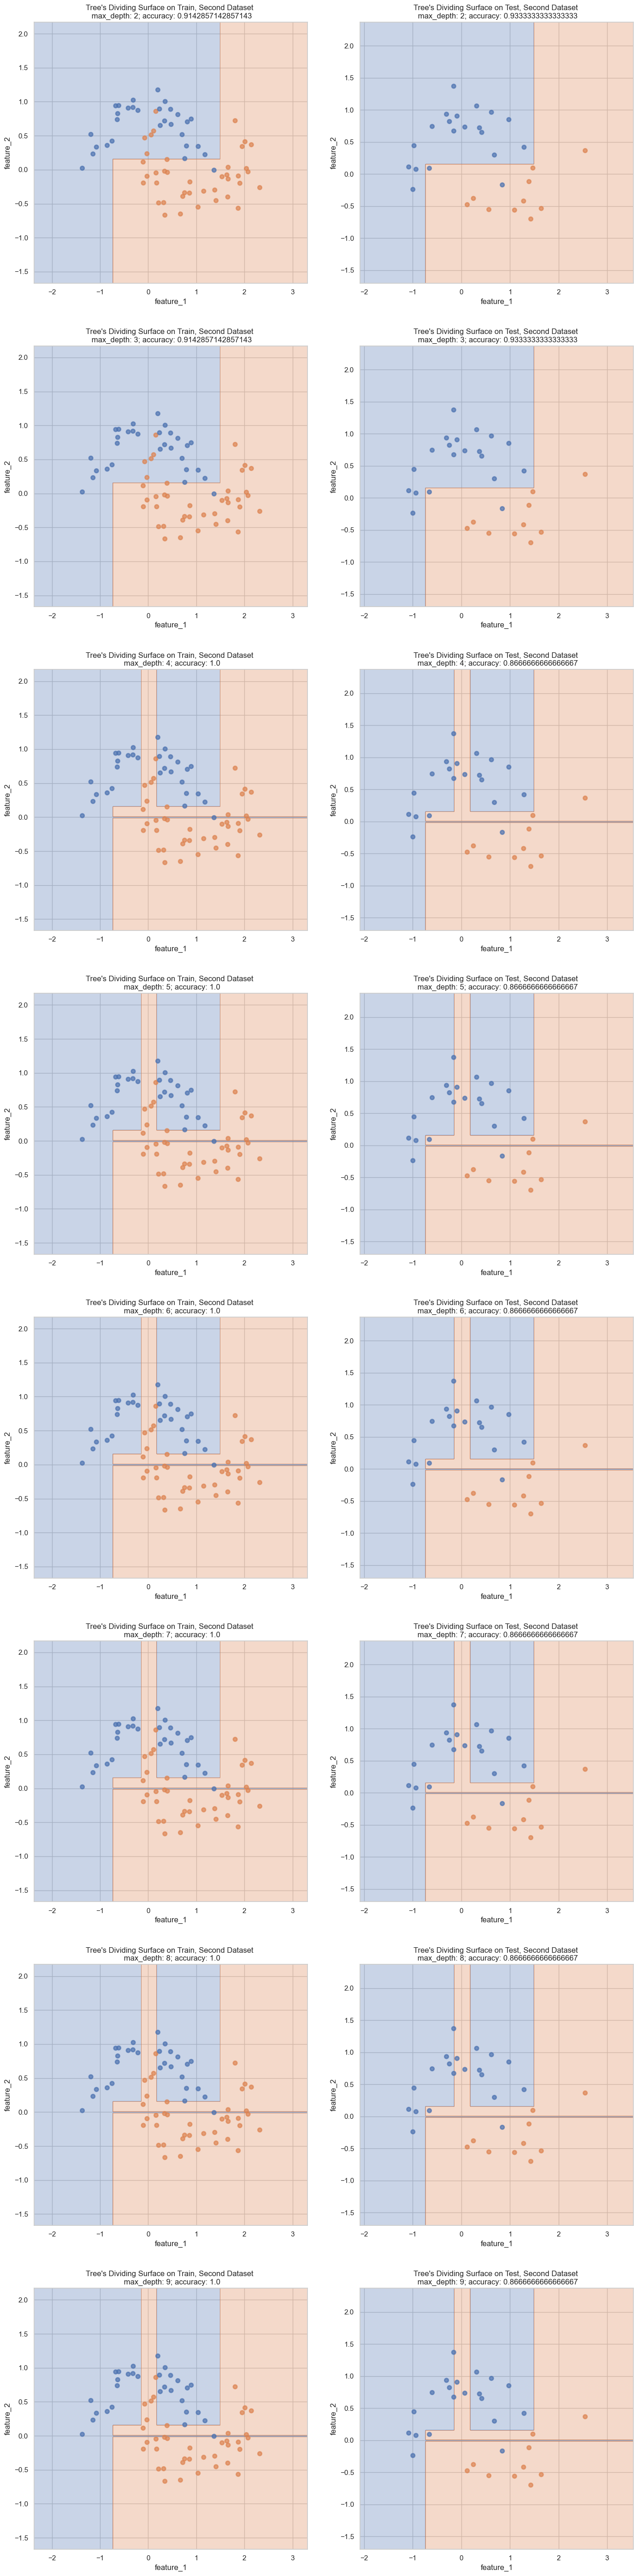

In [38]:
plot_surfaces_by_hyperparameter_arr(datasets[1], 1, "max_depth", max_depth_vals) #2 dataset

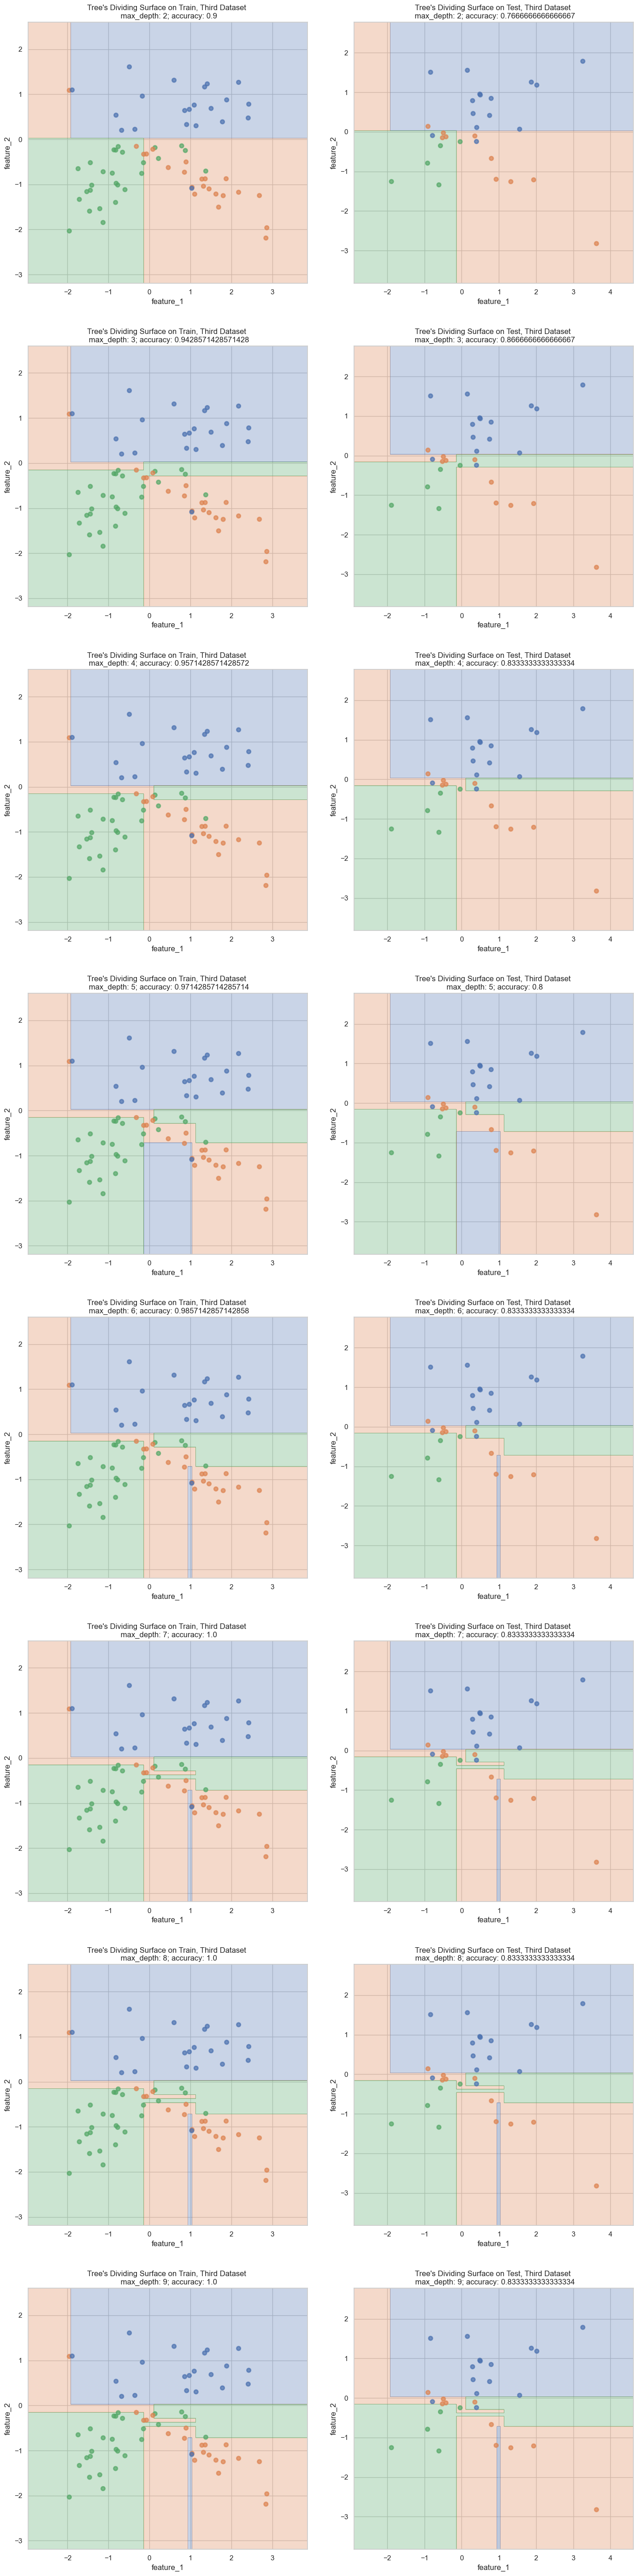

In [39]:
plot_surfaces_by_hyperparameter_arr(datasets[2], 2, "max_depth", max_depth_vals) #3 dataset

**Вывод:**
Сразу стоит оговорить, что выводы для разных датасетов будут разные из-за особенностей данных в них (деревья с заданным `random_state`, очевидно, будут по-разному фиттиться под разные данные).

**Теперь непосредственно о том, что показали графики:**

- На первом датасете при совсем неглубоких деревьях (`max_depth==2`) обобщающая способность достаточно высока, но при этом сам результат для разделяющей поверхности получается слишком грубый, как на трейне, так и на тесте. При бОльших, но не слишком большИх, значениях (`max_depth==3`, `max_depth==4`, `max_depth==5`) деревья становятся глубже => получаем достаточно высокую обобщающую способность дерева, а оно ещё относительно слабо переобучается, что сказывается и на accuracy - accuracy становится выше с увеличением max_depth, как на трейне, так и на тесте. При этом при `max_depth==4`, `max_depth==5` деревья уже начинают переобучаться, что видно по разделяющей поверхности - на графике появляются очень узкие области, соответствующие тому или иному классу, что означает, что дерево начинает слишком "подгоняться" под некоторые объекты в выборке. При совсем больших значениях `max_depth` (от 6 до 9) дерево достаточно сильно переобучается, так как оно стало ещё глубже, а обобщающая способность дерева уменьшается  (судя по разделяющей поверхности), что сказывается и на accuracy - он становится меньше, чем на дереве с меньшим `max_depth`. При этом на значениях `max_depth` от 6 до 9 разделяющая поверхность уже не меняется, что скорее всего означает, что максимальная реальная глубина дерева для данного датасета равна 6.

- На втором датасете наибольшая обобщающая способность у дерева оказалась при небольших значениях `max_depth`: 2, 3. Дерево при таких значениях этого гиперпараметра получилось неглубоким и действительно очень хорошо разделило пространство по классам, для прогноза было показано очень большое значение accuracy на тесте: 0.9333.
При бОльших значениях `max_depth` дерево уже достаточно сильно переобучилось (из-за увеличения его глубины) (о переобучении можно судить по узким областям на графиках), что уменьшило и accuracy. При этом на этих значениях `max_depth` - от 4 до 9 - разделяющая поверхность уже не меняется, что скорее всего означает, что максимальная реальная глубина дерева для данного датасета равна 4.

- На третьем датасете получили ситуацию, похожую на ситуацию с первым датасетом.
При совсем неглубоких деревьях (`max_depth==2`) обобщающая способность достаточно высока, но при этом в силу того, что делаем не более одного split'а, сам результат для разделяющей поверхности получается слишком грубый, как на трейне, так и на тесте. При бОльших, но не слишком большИх, значениях (`max_depth==3`, `max_depth==4`, `max_depth==5`) получаем достаточно высокую обобщающую способность дерева (деревья стали глубже, но ещё не переобучились). При этом в отличие от ситуации с первым датасетом, хотя деревья при `max_depth==4`, `max_depth==5` и не так сильно переобучаются, судя по виду разделяющей поверхности, они выдают accuracy хуже (а не лучше, как было на первом датасете), чем на менее глубоких деревьях (при этом получается, что при `max_depth`: 3, 4, 5 - accuracy в принципе убывает). При совсем больших значениях `max_depth` (от 6 до 9) дерево ещё глубже, и поэтому достаточно сильно переобучается (об этом можно судить по виду разделяющей поверхности). При этом на значениях `max_depth` от 7 до 9 разделяющая поверхность уже не меняется, что скорее всего означает, что максимальная реальная глубина дерева для данного датасета равна 7.

- `min_samples_split`:

In [40]:
min_samples_split_vals = np.arange(2, 11)

**Первый датасет:**

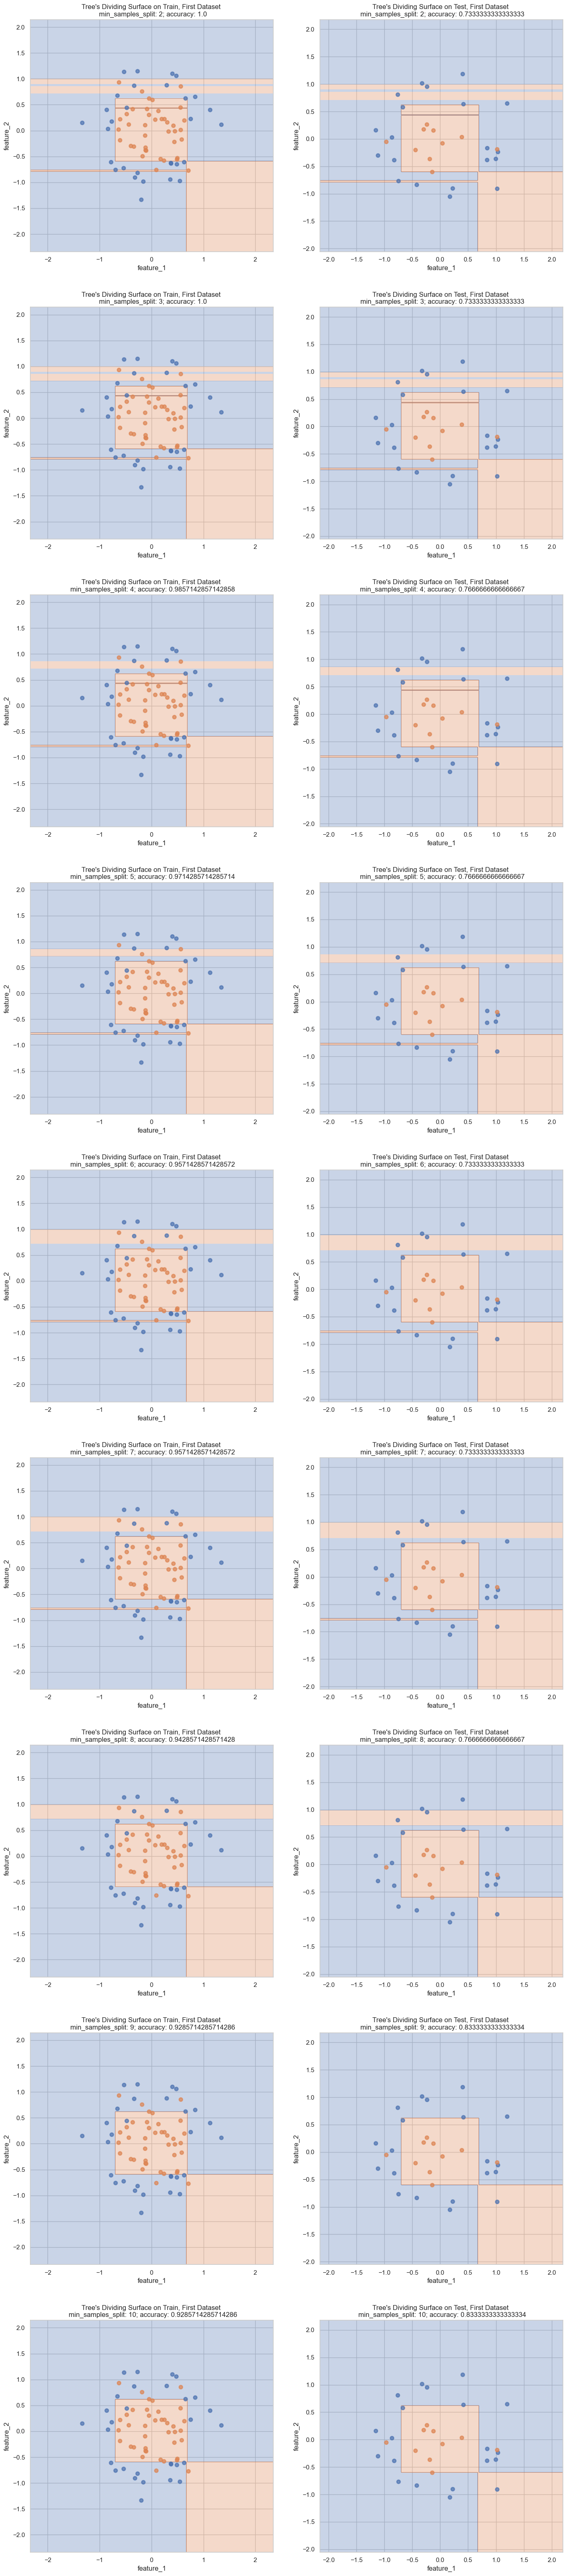

In [41]:
plot_surfaces_by_hyperparameter_arr(datasets[0], 0, "min_samples_split", min_samples_split_vals)

**Второй датасет:**

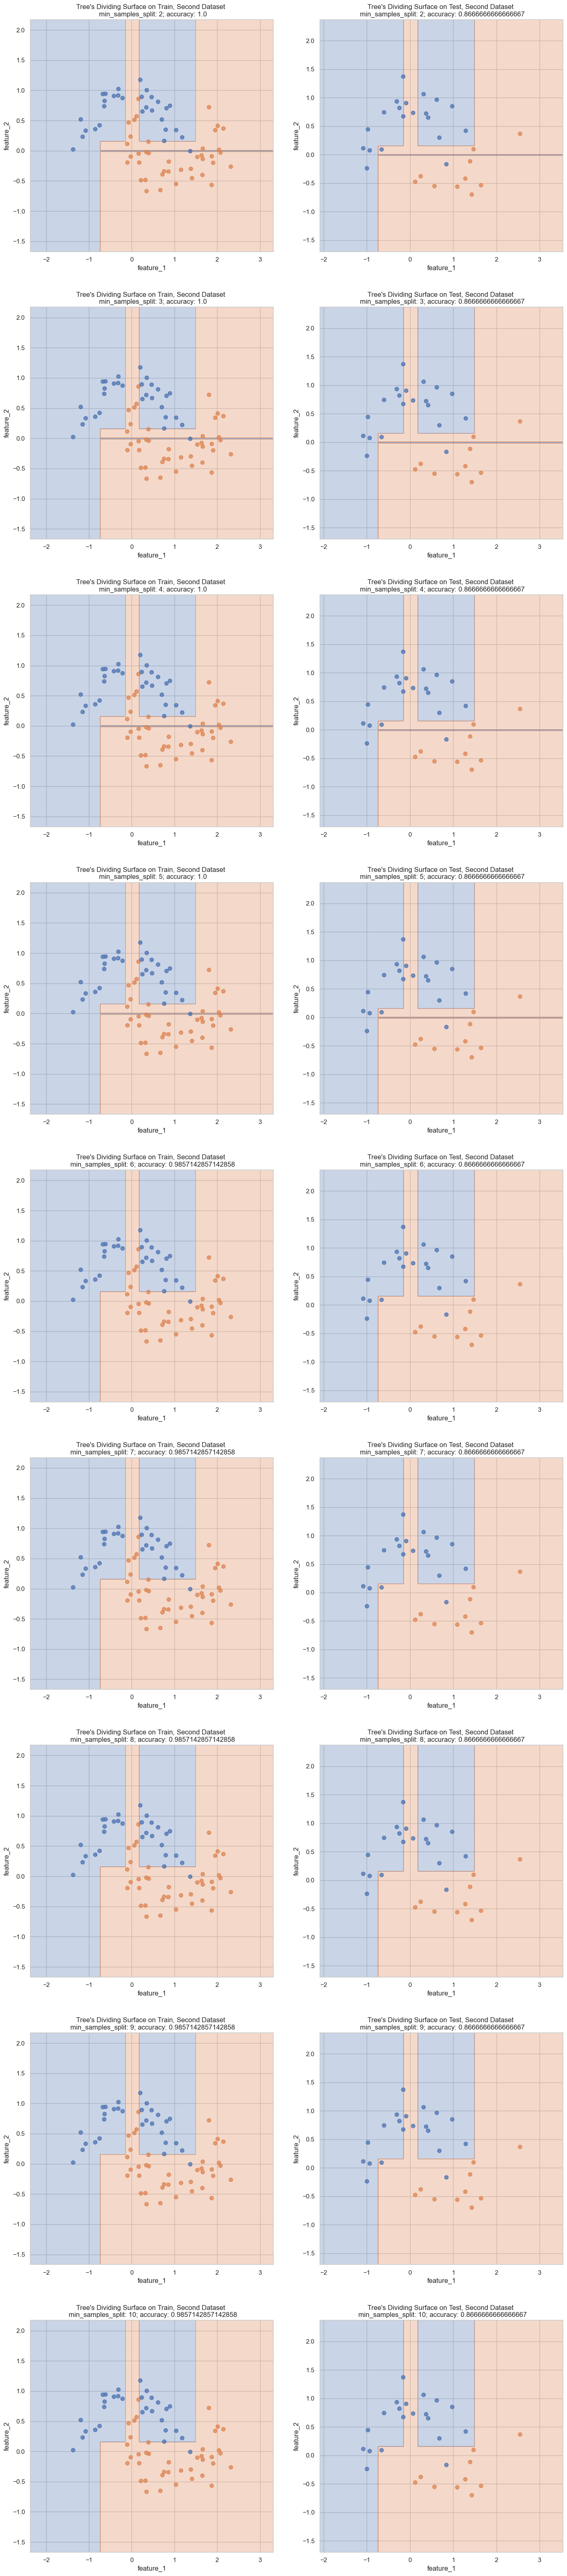

In [42]:
plot_surfaces_by_hyperparameter_arr(datasets[1], 1, "min_samples_split", min_samples_split_vals)

**Третий датасет:**

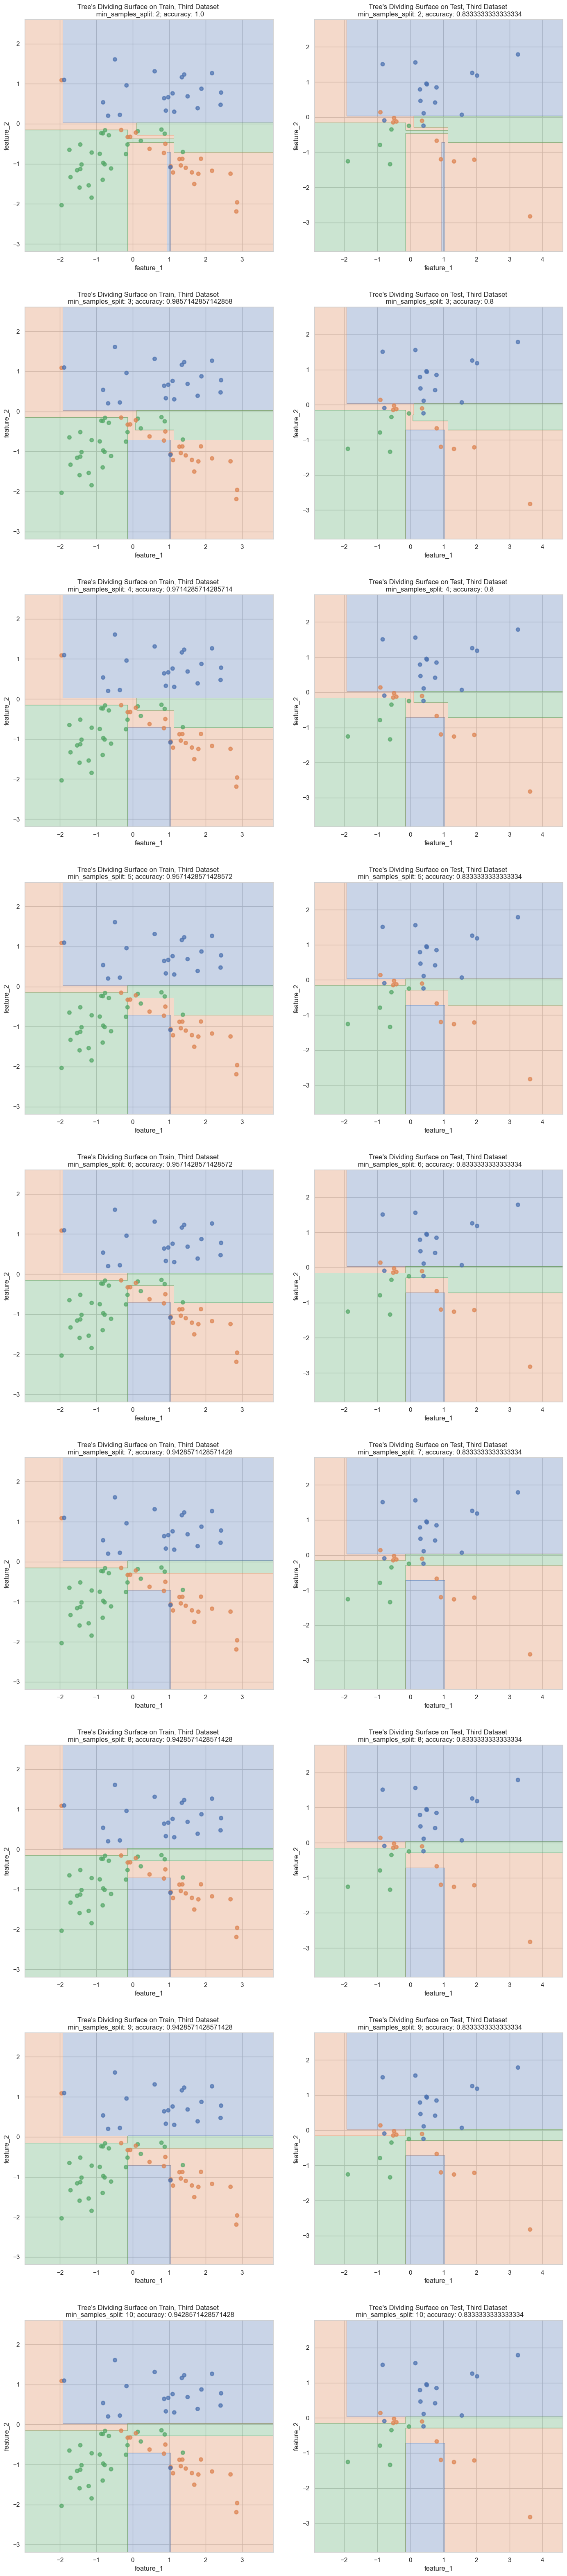

In [43]:
plot_surfaces_by_hyperparameter_arr(datasets[2], 2, "min_samples_split", min_samples_split_vals)

**Вывод:**

**Вспомним, как в общем влияет на переобученность дерева увеличение `min_samples_split`:** если в ноде кол-во элементов меньше, чем `min_samples_split`, то эта нода больше не делится и становится листом => чем больше `min_samples_split`, тем более близкие к корню дерева ноды будут становиться листьями. То есть чем больше `min_samples_split`, тем дерево будет менее переобученным.

Здесь, как и для экспериментов со значениями `max_depth`, стоит оговориться, что выводы для разных датасетов не будут одинаковыми из-за особенностей данных в них (деревья с заданным `random_state`, очевидно, будут по-разному фиттиться под разные данные).

**Теперь непосредственно о том, что показали графики:**

- На первом датасете при небольших значениях `min_samples_split` (`min_samples_split`: 2, 3) получаем сильно переобученное дерево (судя по наличию узких областей на графике на тесте, некоторые из которых даже не покрывают ни одного объекта из теста), его обобщающая способность будет низкой. Accuracy из-за этого таже не очень высок (по сравнению с тем, что будем получать при бОльших значениях `min_samples_split`). С увеличением значения гиперпараметра (`min_samples_split`: 4, 5, 6, 7, 8, 9, 10) будем видеть, что дерево всё менее переобученное, а его обобщающая способность при этом растёт (судя по разделяющей поверхности - на ней с увеличением значения `min_samples_split` уменьшается количество узких областей, разделение пространства на классы становится более "общим", в результате чего меньше происходит именно "подгонки" дерева под объекты выборки и выделяется более общая закономерность в данных). Это можно объяснить общей закономерностью, выделенной в самом начале вывода. Также с увеличением значения `min_samples_split` в среднем увеличивается и accuracy, то есть на данном датасете с увеличением гиперпараметра деревья не только меньше переобучаются, но и из-за более "общей" разделяющей поверхности выдают более качественные предсказания.

- На втором датасете видно, что с увеличением `min_samples_split` (если сравнить графики для теста при `min_samples_split`: 2, 3, 4, 5 - и для `min_samples_split`: 6, 7, 8, 9, 10) дерево становится чуть менее переобученным, но здесь это никак не влияет на его обобщающую способность и на значение accuracy (графики разбиения пространства на классы на тесте получаются почти одинаковые для всех рассматриваемых значений `min_samples_split`). Скорее всего это связано с выставленным `random_state` при разбиении выборки на трейн и тест, а также с тем, что рассматриваемые значения гиперпараметра недостаточно велики, чтобы сильно изменить дерево, которое "фиттится" под эти данные, а следовательно, - и разделяющую поверхность.   

- На третьем датасете ситуация в целом схожа с ситуацией на втором датасете: с увеличением значения `min_samples_split` дерево становится чуть менее переобученным, но это почти никак не влияет на его обобщающую способность и на значение accuracy (здесь даже для некоторых небольших значений `min_samples_split` accuracy становится меньше, чем 0.8333 - это значение получается на третьем датасете на тесте почти для всех деревьев (то есть почти при всех значениях `min_samples_split`)). Это также скорее всего объясняется выставленным при разбиении выборки на трейн и тест `random_state`, а также тем, что рассматриваемые значения гиперпараметра недостаточно велики, чтобы сильно изменить дерево, которое "фиттится" под эти данные, а следовательно, - и разделяющую поверхность.   



- `min_samples_leaf`:

In [44]:
min_samples_leaf_vals = np.arange(1, 11)

**Первый датасет:**

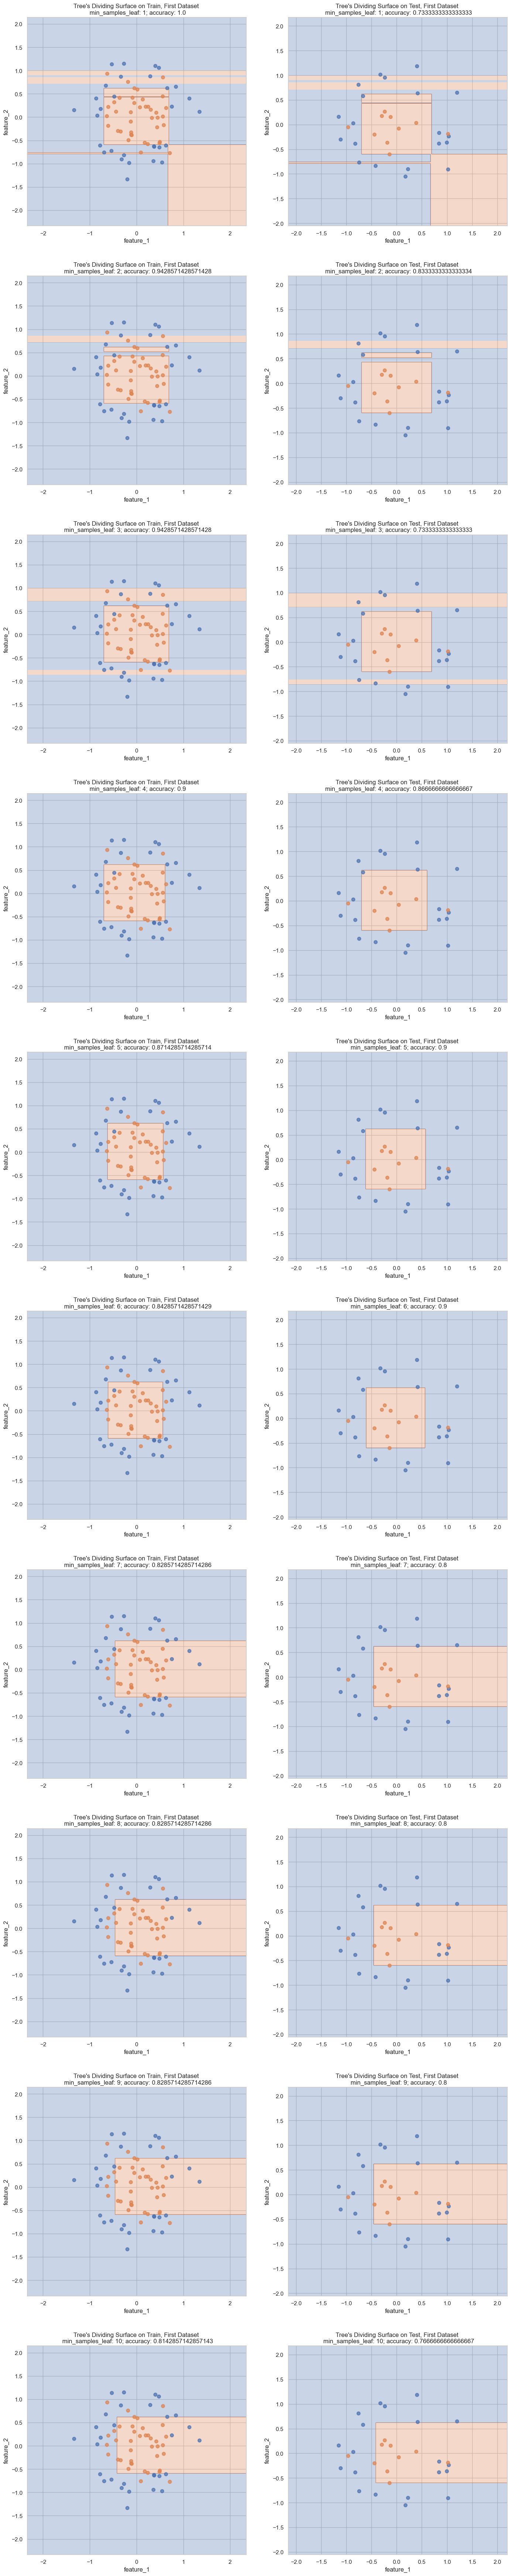

In [45]:
plot_surfaces_by_hyperparameter_arr(datasets[0], 0, "min_samples_leaf", min_samples_leaf_vals)

**Второй датасет:**

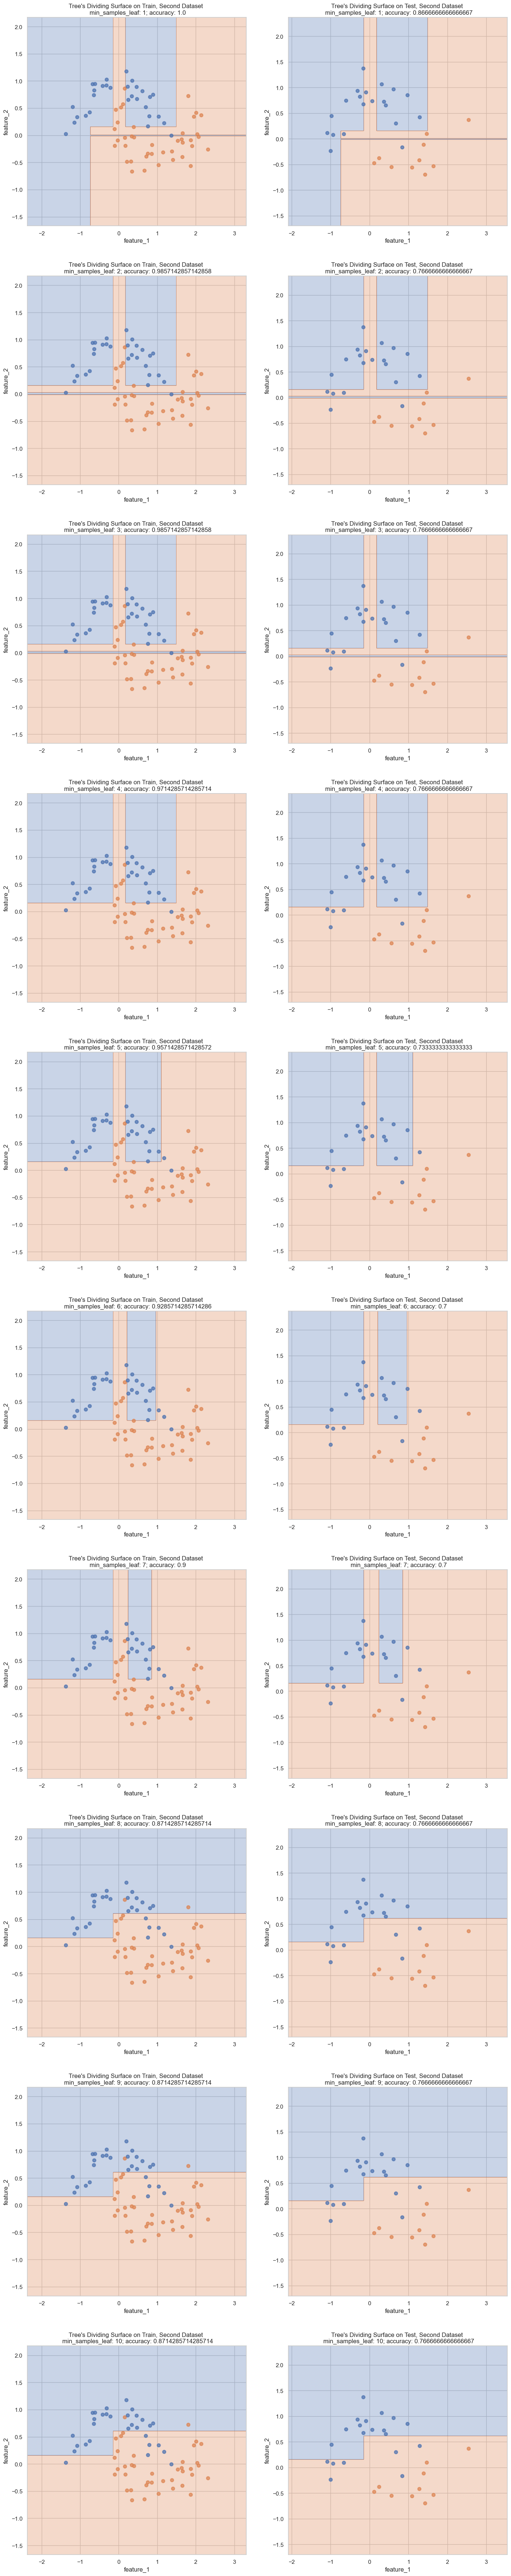

In [46]:
plot_surfaces_by_hyperparameter_arr(datasets[1], 1, "min_samples_leaf", min_samples_leaf_vals)

**Третий датасет:**

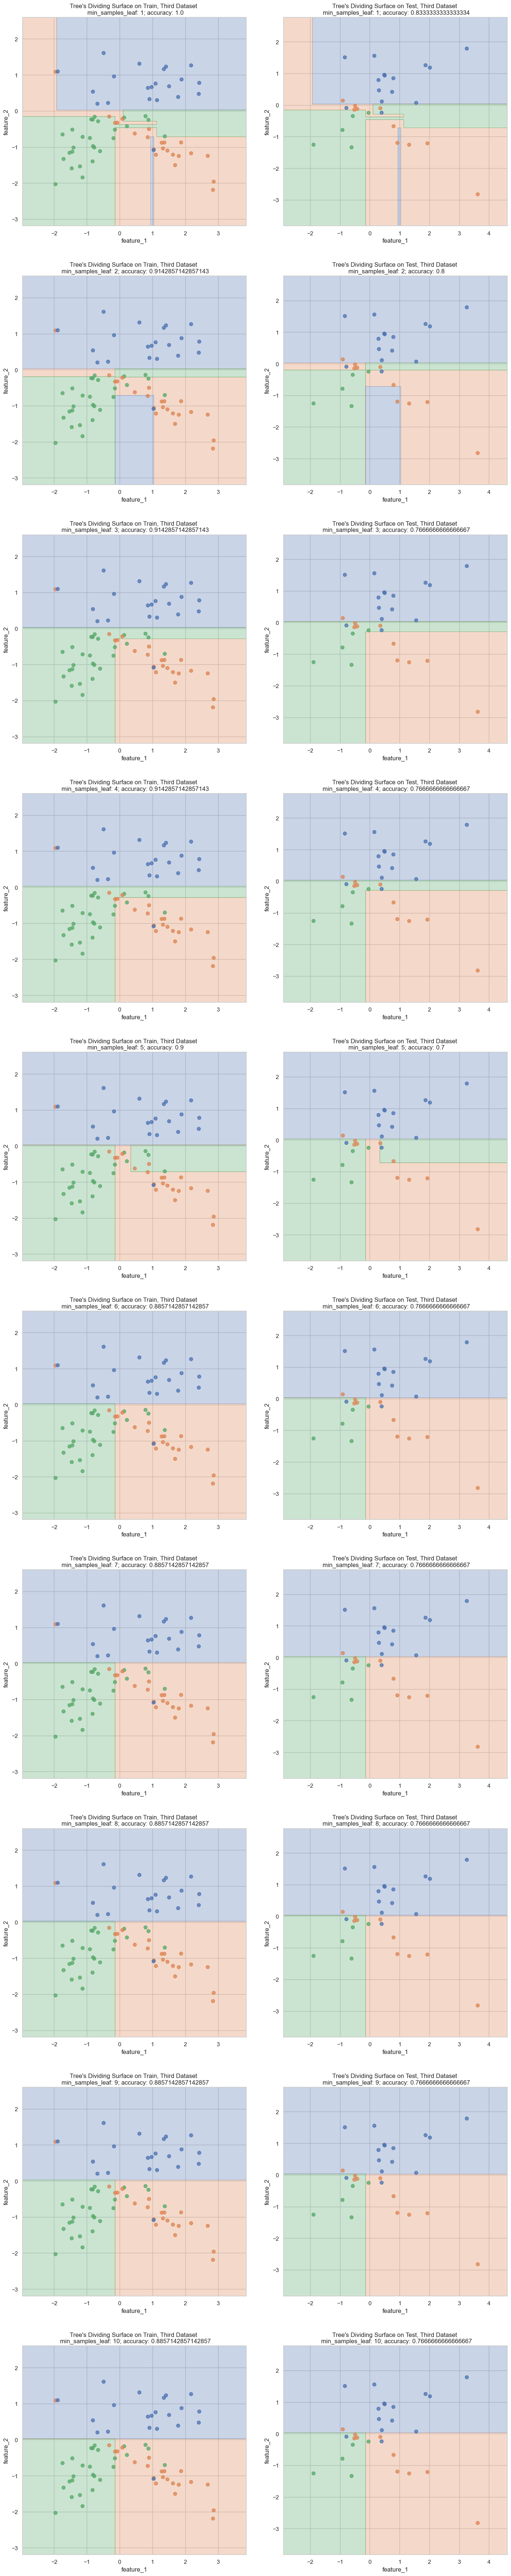

In [47]:
plot_surfaces_by_hyperparameter_arr(datasets[2], 2, "min_samples_leaf", min_samples_leaf_vals)

**Вывод:**

**Вспомним, как в общем влияет на переобученность дерева увеличение `min_samples_leaf`:** `min_samples_leaf` - это минимальное число элементов исходной выборки в подвыборке в листе => этот гиперпараметр фактически обеспечивает, что в дереве в каждом листе не может быть меньше, чем `min_samples_leaf` элементов. Поэтому чем больше `min_samples_leaf`, тем более близкие к корню дерева ноды должны будут стать листьями, что сделает это дерево менее переобученным.

Здесь, как и для экспериментов со значениями других гиперпараметров (см. выше), стоит оговориться, что выводы для разных датасетов не будут одинаковыми из-за особенностей данных в них (деревья с заданным `random_state`, очевидно, будут по-разному фиттиться под разные данные).

**Теперь непосредственно о том, что показали графики:**

- На первом датасете при дефолтном значении `min_samples_leaf==1` дерево сильно переобученное (судя по наличию узких областей на графике на тесте, некоторые из которых даже не покрывают ни одного объекта из теста), его обобщающая способность низка. При увеличении значения `min_samples_leaf` (при значениях `min_samples_leaf`: 2, 3) дерево становится менее переобученным (о чём можно судить по тому, что пропадают узкие области на графике на тесте), его обобщающая способность увеличивается. При этом влияние увеличения значения `min_samples_leaf` на accuracy неоднозначное: при `min_samples_leaf==2` accuracy становится значительно больше, а при `min_samples_leaf==3` возвращается к дефолтному (меньшему) значению accuracy. Это скорее всего объясняется особенностями трейн- и тест-выборок из-за выставленного при разбиении данных на трейн и тест `random_state`. При ещё бОльших значениях гиперпараметра (`min_samples_leaf`: 4, 5, 6) дерево становится ещё менее переобученным (судя по разделяющей поверхности: пространство на графике теперь разделено на квадрат и остальную часть плоскости - то есть разбиение достаточно "общее"), а его обобщающая способность наиболее велика (по сравнению с остальными рассматриваемыми деревьями). Это влияет и на accuracy - он достигает наибольших (из всех рассматриваемых деревьев (и, соответственно, всех рассматриваемых значений `min_samples_leaf`)) значений на выдаваемых деревьями прогнозах. Это можно объяснить общей закономерностью, выделенной в самом начале вывода. Наконец, при самых больших значениях гиперпараметра из рассматриваемых (`min_samples_leaf`: 7, 8, 9, 10) получаем слишком "грубые" разбиения пространства по классам, то есть сталкиваемся с недообучением (деревья получаются совсем неглубокими), из-за чего снижается как обобщающая способность дерева, так и accuracy (причём accuracy падает как на тесте, так и на трейне).

- На втором датасете видно, что с увеличением `min_samples_leaf` от дефолтного значения до 7 включительно дерево становится менее переобученным, но совсем незначительно. Также здесь это никак не влияет на его обобщающую способность и уменьшает значение accuracy (графики разбиения пространства на классы на тесте получаются почти одинаковые для всех рассматриваемых значений `min_samples_leaf`). Скорее всего это связано с выставленным `random_state` при разбиении выборки на трейн и тест, а также с тем, что рассматриваемые значения гиперпараметра недостаточно велики, чтобы сильно изменить дерево, которое "фиттится" под эти данные, а следовательно, - и разделяющую поверхность. При бОльших значениях `min_samples_leaf` (`min_samples_leaf`: 8, 9, 10) получаем слишком "грубые" разбиения пространства по классам, то есть сталкиваемся с недообучением (деревья получаются совсем неглубокими; недообучение можно увидеть по графику и низкому accuracy на трейне), но при этом, в отличие от ситуации на первом датасете, обобщающая способность дерева становится несколько выше, а accuracy - немного увеличивается (и становится сравним с accuracy при небольших значениях `min_samples_leaf` (`min_samples_leaf`: 2, 3, 4)). Скорее всего это объясняется выставленным при разбиении выборки на трейн и тест `random_state`.

- На третьем датасете при небольших значениях `min_samples_leaf` (`min_samples_leaf`: 1, 2, 3, 4, 5) дерево ещё несколько переобучено, при этом с увеличением `min_samples_leaf` - переобучение всё меньше, а обобщающая способность - всё выше. При этом accuracy на тесте уменьшается с увеличением `min_samples_leaf`, что можно объяснить особенностями в данных (из-за выставленного при разбиении выборки на трейн и тест `random_state`). При бОльших значениях `min_samples_leaf` сталкиваемся с недообучением: деревья получаются неглубокие => получаем слишком "грубые"/"общие" разбиения пространства по классам, низкий accuracy как на тесте, так и на трейне.  

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

In [49]:
from hw5code import find_best_split

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [50]:
df = pd.read_csv("students.csv")
df.head()


STG   SCG   STR   LPR   PEG  UNS
0  0.00  0.00  0.00  0.00  0.00    0
1  0.08  0.08  0.10  0.24  0.90    1
2  0.06  0.06  0.05  0.25  0.33    0
3  0.10  0.10  0.15  0.65  0.30    1
4  0.08  0.08  0.08  0.98  0.24    0

In [51]:
X = df.drop(columns=["UNS"])
y = df["UNS"]

**Построим для каждого признака scatter-график "Значение Признака - Класс":**

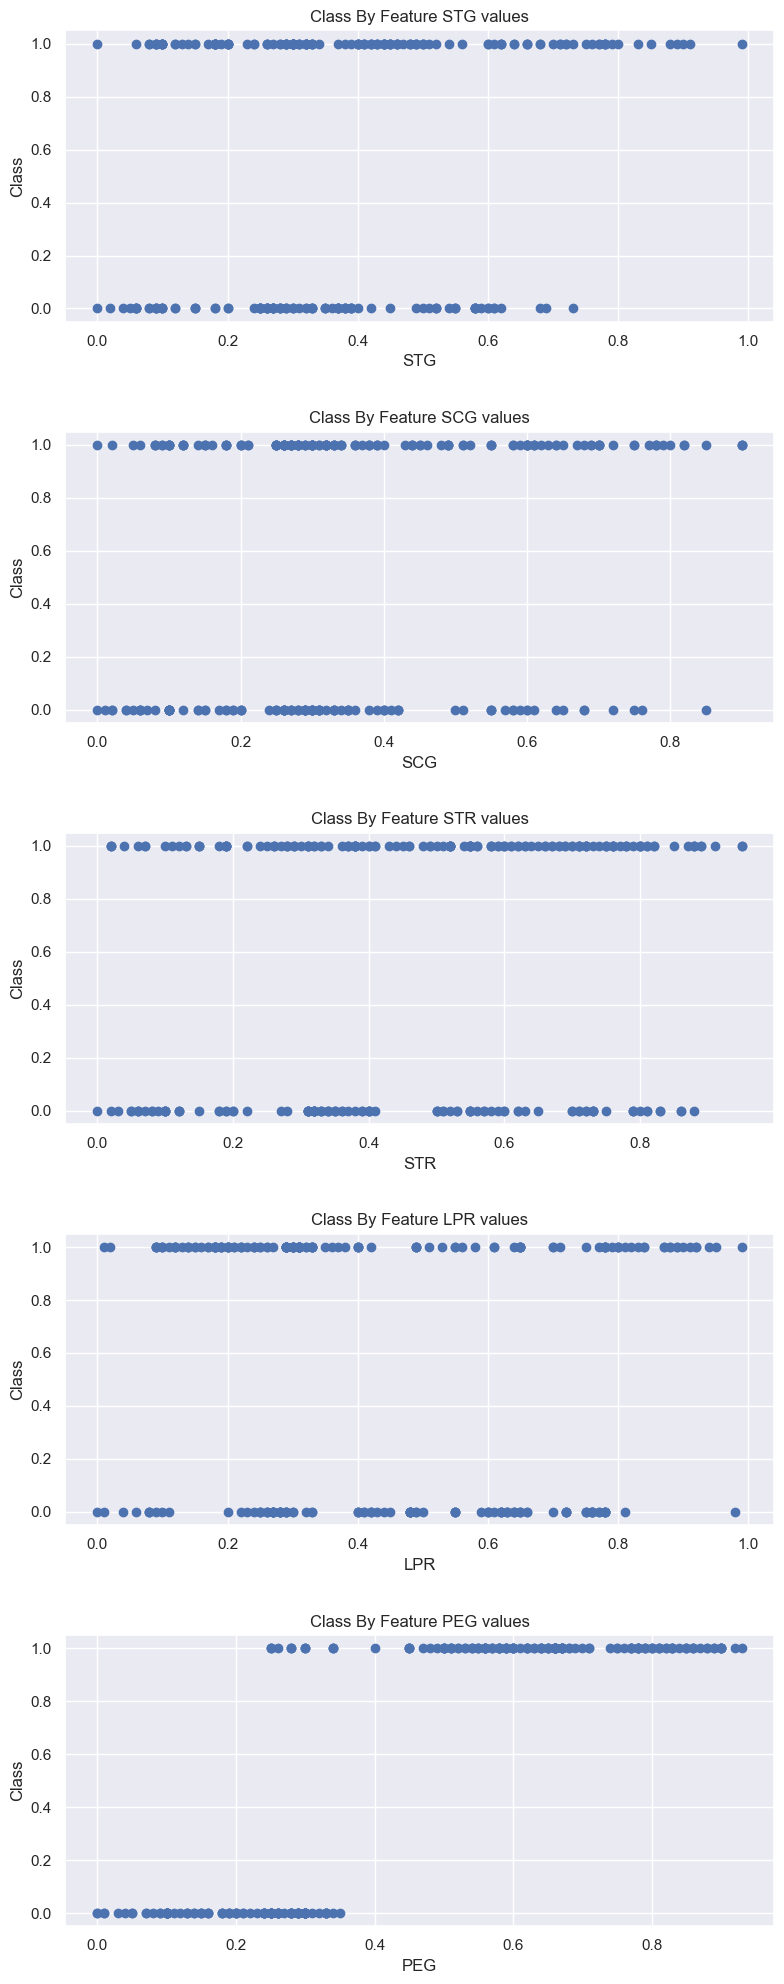

In [53]:
sns.set(style='darkgrid')
fig, ax = plt.subplots(5, 1, figsize=(8, 5 * 4))

for ind, column in enumerate(X.columns):
    ax[ind].scatter(X[column], y)
    ax[ind].set_title("Class By Feature {} values".format(column))
    ax[ind].set_xlabel(column)
    ax[ind].set_ylabel("Class")

plt.tight_layout(h_pad=2.5)

plt.show()

**Построим для каждого признака кривую "Порог-Значение Критерия Джини":**

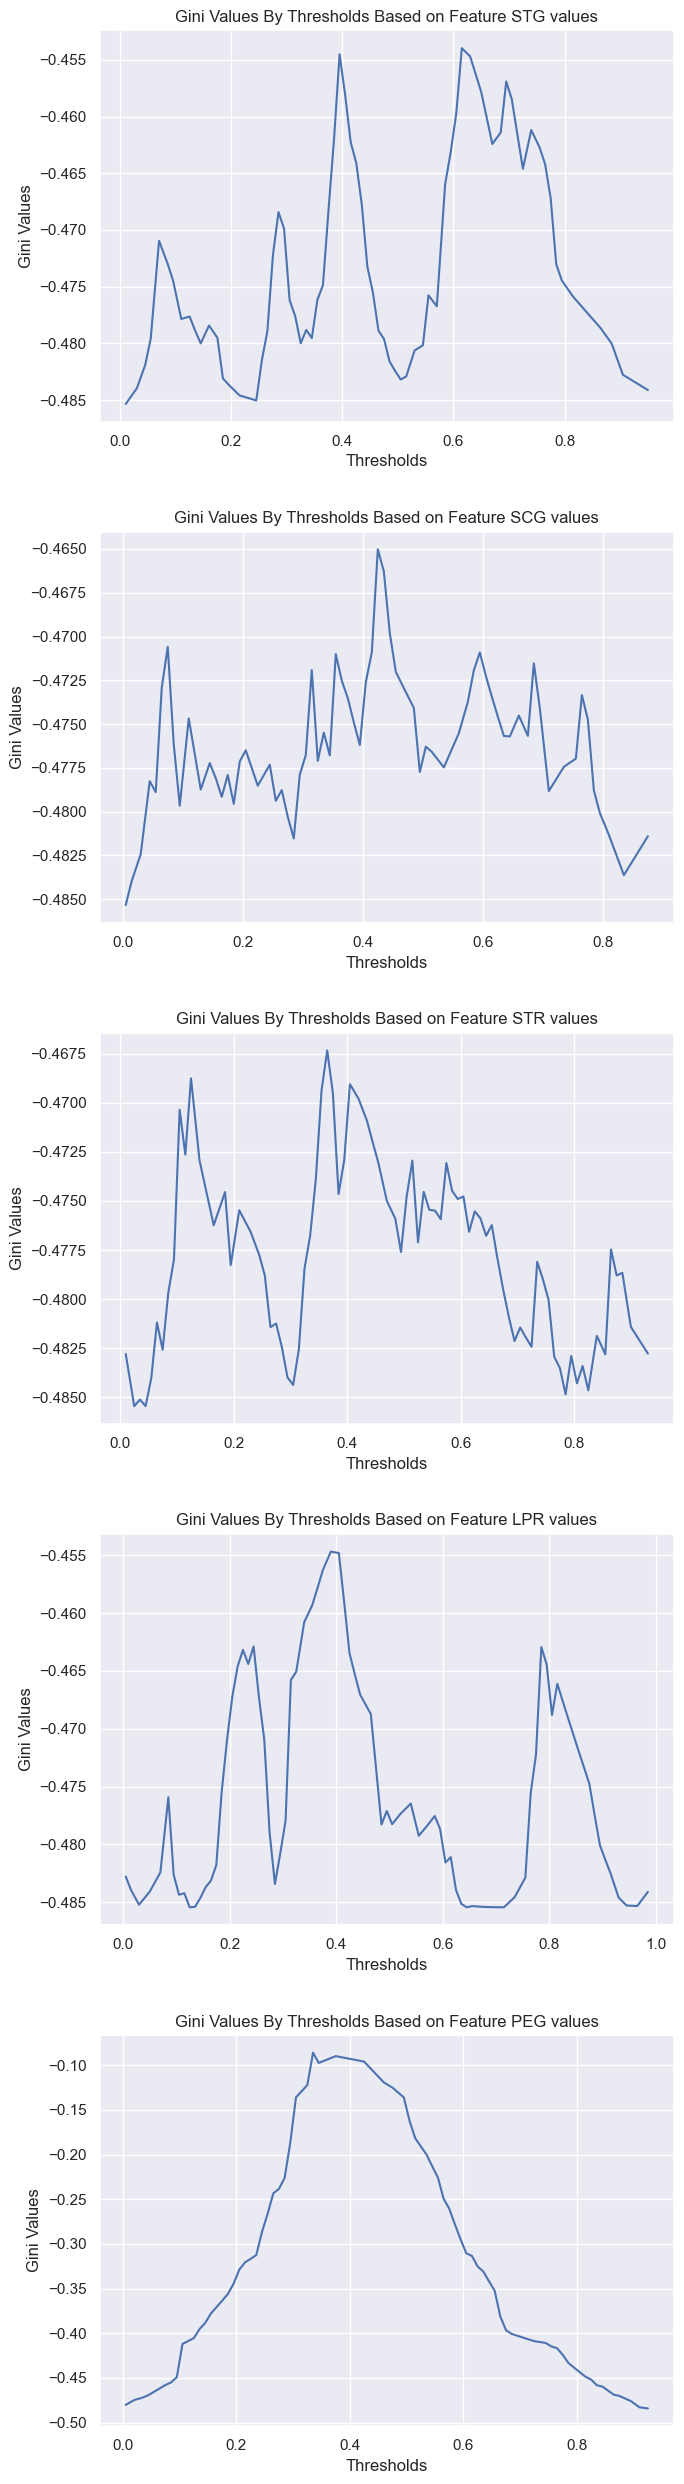

In [54]:
fig, ax = plt.subplots(5, 1, figsize=(7, 5 * 5))

for ind, column in enumerate(X.columns):
    thresholds, ginis, _, _ = find_best_split(X[column], y)
    ax[ind].plot(thresholds, ginis)
    ax[ind].set_title("Gini Values By Thresholds Based on Feature {} values".format(column))
    ax[ind].set_xlabel("Thresholds")
    ax[ind].set_ylabel("Gini Values")

plt.tight_layout(h_pad=2.5)

plt.show()

**Как можно видеть трешхолды для разных кривых в принципе одни и те же => построим эти кривые на одном графике:**

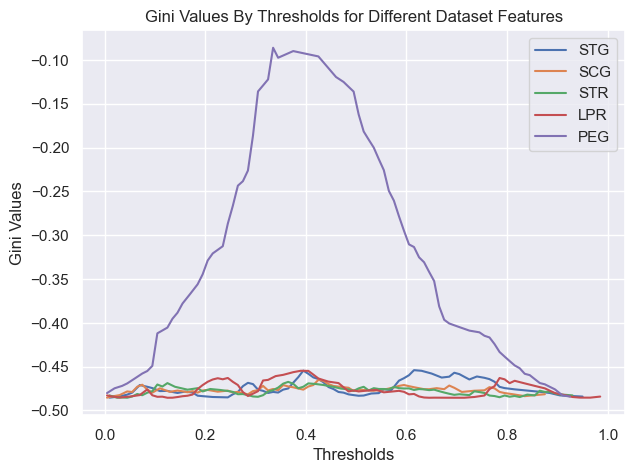

In [55]:
fig = plt.figure(figsize=(7, 5))

for column in X.columns:
    thresholds, ginis, _, _ = find_best_split(X[column], y)
    plt.plot(thresholds, ginis, label=column)

plt.title("Gini Values By Thresholds for Different Dataset Features")
plt.xlabel("Thresholds")
plt.ylabel("Gini Values")
plt.legend()

plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Исходя из того, какие получили кривые, можно сделать вывод, что лучше всего делить выборку по 5 признаку (PEG) - с порогом $\approx 0.4$, так как функционал качества $Q(R) = -\dfrac{|R_l|}{|R|} H(R_l) - \dfrac{|R_r|}{|R|} H(R_r)$ для этого признака - наиболее близок к вогнутому из всех рассматриваемых (но не вогнутый) и так как максимум функционала (который достигается как раз при пороге $\approx 0.4$) - "широкий". Это согласуется со scatter-графиком: из 5 scatter-графика (для признака PEG) видно, что данные как раз хорошо разделяются по классам порогом $\approx 0.4$.

Можно на основе полученных результатов сделать следующий вывод: признак - "идеальный", то есть по нему выборка идеально разделима по классам, если функционал качества $Q(R)$ - вогнутый по порогам (то есть на графике функционала качества в зависимости от порога - единственный локальный максимум, являющийся и глобальным максимумом); признак - "хороший", то есть по нему можно разделить выборку очень точно на классы, но не идеально, - если кривая обладает очень небольшим количеством "заметных", "широких" максимумов, среди которых можно выделить глобальный; кривые же для признаков, по которым делить выборку сложно или практически невозможно, обладают большим количеством "узких" оптимумов - как максимумов, так и минимумов - что сильно затрудняет поиск наилучшего с точки зрения значения Джини порога.

**Замечание:** также можно заметить, что значение глобального максимума $Q(R)$ максимально именно на 5 графике (PEG), если сравнивать глобальные максимумы всех пяти графиков (причём глобальный максимум на 5 графике гораздо больше глобальных максимумов на других графиках). Это также означает, что максимальная взвешенная сумма impurity ($H(R_l), \ H(R_r)$) по обоим поддеревьям наилучшая именно для 5 признака => каждый impurity со своим весом будет мал по модулю, что скорее всего и означает, что в каждом из поддеревьев почти все элементы - одного класса (следует из определения impurity), а это в свою очередь и означает, что мы почти идеально разделили выборку по классам для данного порога (при котором достигается глобальный максимум).

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [56]:
from hw5code import DecisionTree

In [57]:
mushrooms_df_column_names = ["class", "cap-shape", "cap-surface", "cap-color", "bruises?", "odor",
                             "gill-attachment", "gill-spacing", "gill-size", "gill-color",
                             "stalk-shape", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring",
                             "stalk-color-above-ring", "stalk-color-below-ring",
                             "veil-type", "veil-color", "ring-number", "ring-type",
                             "spore-print-color", "population", "habitat"]

df = pd.read_csv("agaricus-lepiota.data", names=mushrooms_df_column_names)
df.head()


class cap-shape cap-surface cap-color bruises? odor gill-attachment  \
0     p         x           s         n        t    p               f   
1     e         x           s         y        t    a               f   
2     e         b           s         w        t    l               f   
3     p         x           y         w        t    p               f   
4     e         x           s         g        f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

**Пропуски:** Из описания к данным следует, что явных пропусков нет (то есть нет ситуаций, когда значения нет в ячейке), "неявные" пропуски обозначены знаком вопроса, они есть только в одном столбце => их можно будет считать как отдельную категорию для данного столбца.
Проверим:

In [58]:
df.isna().any()

class                       False
cap-shape                   False
cap-surface                 False
cap-color                   False
bruises?                    False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                  False
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                   False
veil-color                  False
ring-number                 False
ring-type                   False
spore-print-color           False
population                  False
habitat                     False
dtype: bool

**Явных пропусков действительно нет => всё хорошо.**

**Применим к каждому столбцу LabelEncoder, чтобы преобразовать строки в натуральные числа:**

In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [61]:
df.head()

class  cap-shape  cap-surface  cap-color  bruises?  odor  gill-attachment  \
0      1          5            2          4         1     6                1   
1      0          5            2          9         1     0                1   
2      0          0            2          8         1     3                1   
3      1          5            3          8         1     6                1   
4      0          5            2          3         0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4             1          0           4  ...                         2   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0                       7                       7          0           2   
1                       7                       7          0           2   
2                       7                       7          0           2   
3                       7                       7          0           2   
4                       7                       7          0           2   

   ring-number  ring-type  spore-print-color  population  habitat  
0            1          4                  2           3        5  
1            1          4                  3           2        1  
2            1          4                  3           2        3  
3            1          4                  2           3        5  
4            1          0                  3           0        1  

[5 rows x 23 columns]

**Далее будем тестировать дерево на нескольких разных `random_state`'ах, чтобы удостовериться, что оно в принципе работает, как требуется, а не только на одном хорошем `random_state`:**

- **`random_state=42`:**

**Разобьём датасет на X и y, затем - на трейн и на тест с помощью `train_test_split`:**

In [62]:
X = df.drop(columns=["class"])
y = df["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

**Обучим дерево по данным, сделаем предсказания, вычислим для них accuracy, посмотрим на глубину полученного дерева:**

In [63]:
from sklearn.metrics import accuracy_score

tree = DecisionTree(["categorical"] * X_train.shape[1])
tree.fit(X_train.values, y_train.values)
pred = tree.predict(X_test.values)

print("Accuracy:", accuracy_score(y_test, pred))
print("Tree Depth:", tree._depth)

Accuracy: 1.0
Tree Depth: 8


Получили идеальный Accuracy (как и было задумано) и достаточно глубокое дерево (здесь это скорее зависит от датасета и того, что считать глубоким/неглубоким деревом, т.е. вообще говоря, дерево глубины 8 - глубокое дерево, но здесь почему-то это должно считаться неглубоким деревом).

- **`random_state=73`:**

**Разобьём датасет на X и y, затем - на трейн и на тест с помощью `train_test_split`:**

In [64]:
X = df.drop(columns=["class"])
y = df["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=73)

**Обучим дерево по данным, сделаем предсказания, вычислим для них accuracy, посмотрим на глубину полученного дерева:**

In [65]:
from sklearn.metrics import accuracy_score

tree = DecisionTree(["categorical"] * X_train.shape[1])
tree.fit(X_train.values, y_train.values)
pred = tree.predict(X_test.values)

print("Accuracy:", accuracy_score(y_test, pred))
print("Tree Depth:", tree._depth)

Accuracy: 1.0
Tree Depth: 8


Получили то же самое, что и в предыдущем случае.

- **`random_state=10`:**

**Разобьём датасет на X и y, затем - на трейн и на тест с помощью `train_test_split`:**

In [66]:
X = df.drop(columns=["class"])
y = df["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=10)

**Обучим дерево по данным, сделаем предсказания, вычислим для них accuracy, посмотрим на глубину полученного дерева:**

In [67]:
from sklearn.metrics import accuracy_score

tree = DecisionTree(["categorical"] * X_train.shape[1])
tree.fit(X_train.values, y_train.values)
pred = tree.predict(X_test.values)

print("Accuracy:", accuracy_score(y_test, pred))
print("Tree Depth:", tree._depth)

Accuracy: 1.0
Tree Depth: 8


Опять получили то же самое.

**Итог:** Дерево работает так, как и было задумано.

__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

Опишу, как обрабатывал гиперпараметры при построении дерева:

- `max_depth` - если в ноде глубина дерева меньше, чем `self._max_depth`, то делим подвыборку в данной ноде; иначе сразу, до попыток разделить подвыборку в ноде, обрабатываем ноду как терминальную и выходим из `_fit_node(...)`

- `min_samples_split` - если в ноде кол-во элементов подвыборки, соответствующей ей, больше либо равно `self._min_samples_split`, то можем делить выборку дальше; если же кол-во элементов в подвыборке меньше, чем `self._min_samples_split`, то не можем делить подвыборку в этой вершине => сразу, до попыток разделить подвыборку, обрабатываем ноду как терминальную и выходим из `_fit_node(...)`

- `min_samples_leaf` - можем делить подвыборку в данной вершине по определённому признаку по определённому трешхолду, только если в результате разбиения и левому, и правому поддереву соответствует кол-во элементов, не меньшее, чем `self._min_samples_leaf`. Тогда действуем следующим образом: для каждого признака передаём этот параметр в функцию `find_best_split(...)`, отбираем наилучший сплит, но такой, который удовлетворяет условию с `min_samples_leaf`. затем если сплит нашёлся, то сравниваем его со сплитами для остальных признаков и действуем, как обычно; если же сплит не нашёлся, то пропускаем эту итерацию. В итоге если ни одного сплита не получилось сделать, `feature_best` будет `None` => делаем вершину терминальной.

In [68]:
df = pd.read_csv("tic-tac-toe-endgame.csv")
df.head()

V1 V2 V3 V4 V5 V6 V7 V8 V9       V10
0  x  x  x  x  o  o  x  o  o  positive
1  x  x  x  x  o  o  o  x  o  positive
2  x  x  x  x  o  o  o  o  x  positive
3  x  x  x  x  o  o  o  b  b  positive
4  x  x  x  x  o  o  b  o  b  positive

In [69]:
df.isna().any()

V1     False
V2     False
V3     False
V4     False
V5     False
V6     False
V7     False
V8     False
V9     False
V10    False
dtype: bool

Пропусков нет!

**Применим к каждому столбцу LabelEncoder, чтобы преобразовать строки в натуральные числа:**

In [70]:
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [71]:
df.head()

V1  V2  V3  V4  V5  V6  V7  V8  V9  V10
0   2   2   2   2   1   1   2   1   1    1
1   2   2   2   2   1   1   1   2   1    1
2   2   2   2   2   1   1   1   1   2    1
3   2   2   2   2   1   1   1   0   0    1
4   2   2   2   2   1   1   0   1   0    1

**Разобьём датасет на X и y, затем - на трейн и на тест с помощью `train_test_split`:**

In [72]:
X = df.drop(columns=["V10"])
y = df["V10"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Теперь построим графики:**

- **`max_depth` (смотрим значения от 1 до 15):**

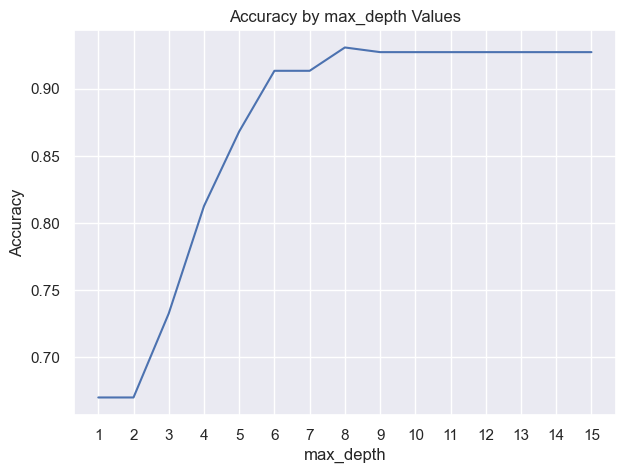

In [73]:
max_depth_vals = np.arange(1, 16)
accuracy_vals = []

for max_depth in max_depth_vals:
    tree = DecisionTree(["categorical"] * X_train.shape[1], max_depth=max_depth)
    tree.fit(X_train.values, y_train.values)
    pred = tree.predict(X_test.values)
    accuracy_vals += [accuracy_score(y_test, pred)]

fig = plt.figure(figsize=(7, 5))

plt.plot(max_depth_vals, accuracy_vals)

plt.title("Accuracy by max_depth Values")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.xticks(np.arange(1, 16))

plt.show()

- **`min_samples_split` (смотрим значения от 2 до 20):**

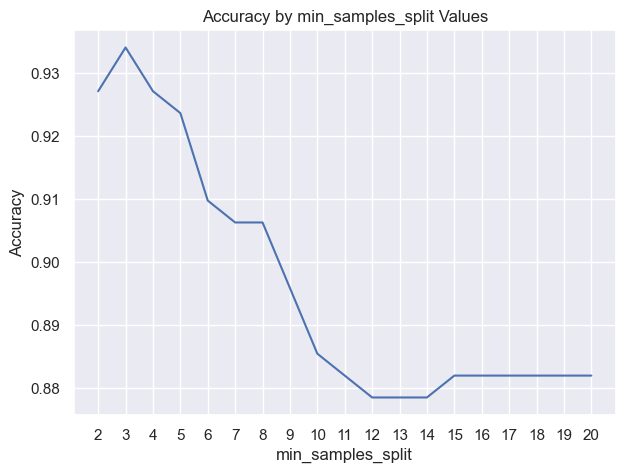

In [74]:
min_samples_split_vals = np.arange(2, 21)
accuracy_vals = []

for min_samples_split in min_samples_split_vals:
    tree = DecisionTree(["categorical"] * X_train.shape[1], min_samples_split=min_samples_split)
    tree.fit(X_train.values, y_train.values)
    pred = tree.predict(X_test.values)
    accuracy_vals += [accuracy_score(y_test, pred)]

fig = plt.figure(figsize=(7, 5))

plt.plot(min_samples_split_vals, accuracy_vals)

plt.title("Accuracy by min_samples_split Values")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.xticks(np.arange(2, 21))

plt.show()

- **`min_samples_leaf` (смотрим значения от 1 до 20):**

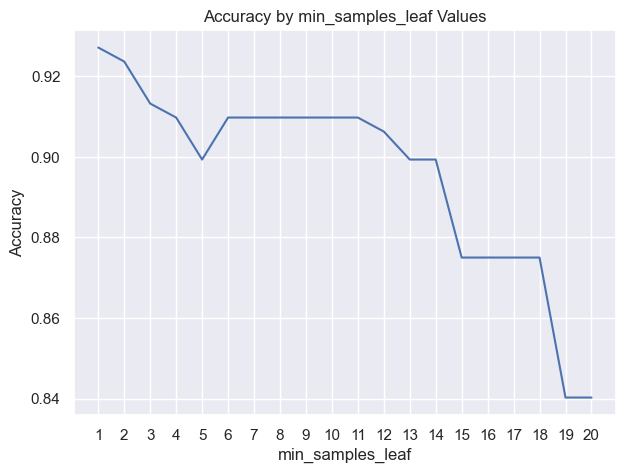

In [75]:
min_samples_leaf_vals = np.arange(1, 21)
accuracy_vals = []

for min_samples_leaf in min_samples_leaf_vals:
    tree = DecisionTree(["categorical"] * X_train.shape[1], min_samples_leaf=min_samples_leaf)
    tree.fit(X_train.values, y_train.values)
    pred = tree.predict(X_test.values)
    accuracy_vals += [accuracy_score(y_test, pred)]

fig = plt.figure(figsize=(7, 5))

plt.plot(min_samples_leaf_vals, accuracy_vals)

plt.title("Accuracy by min_samples_leaf Values")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.xticks(np.arange(1, 21))

plt.show()

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

In [78]:
mushrooms_df_column_names = ["class", "cap-shape", "cap-surface", "cap-color", "bruises?", "odor",
                             "gill-attachment", "gill-spacing", "gill-size", "gill-color",
                             "stalk-shape", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring",
                             "stalk-color-above-ring", "stalk-color-below-ring",
                             "veil-type", "veil-color", "ring-number", "ring-type",
                             "spore-print-color", "population", "habitat"]

df = pd.read_csv("agaricus-lepiota.data", names=mushrooms_df_column_names)
df.head()

class cap-shape cap-surface cap-color bruises? odor gill-attachment  \
0     p         x           s         n        t    p               f   
1     e         x           s         y        t    a               f   
2     e         b           s         w        t    l               f   
3     p         x           y         w        t    p               f   
4     e         x           s         g        f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

In [79]:
df.isna().any()

class                       False
cap-shape                   False
cap-surface                 False
cap-color                   False
bruises?                    False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                  False
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                   False
veil-color                  False
ring-number                 False
ring-type                   False
spore-print-color           False
population                  False
habitat                     False
dtype: bool

**Пропусков действительно нет!**

**Применим к каждому столбцу LabelEncoder, чтобы преобразовать строки в натуральные числа (в том числе и к столбцу с таргетом, так как далее считаем accuracy, который не зависит от того, какой класс положительный, а какой - отрицательный):**

In [80]:
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

df

class  cap-shape  cap-surface  cap-color  bruises?  odor  \
0         1          5            2          4         1     6   
1         0          5            2          9         1     0   
2         0          0            2          8         1     3   
3         1          5            3          8         1     6   
4         0          5            2          3         0     5   
...     ...        ...          ...        ...       ...   ...   
8119      0          3            2          4         0     5   
8120      0          5            2          4         0     5   
8121      0          2            2          4         0     5   
8122      1          3            3          4         0     8   
8123      0          5            2          4         0     5   

      gill-attachment  gill-spacing  gill-size  gill-color  ...  \
0                   1             0          1           4  ...   
1                   1             0          0           4  ...   
2                   1             0          0           5  ...   
3                   1             0          1           5  ...   
4                   1             1          0           4  ...   
...               ...           ...        ...         ...  ...   
8119                0             0          0          11  ...   
8120                0             0          0          11  ...   
8121                0             0          0           5  ...   
8122                1             0          1           0  ...   
8123                0             0          0          11  ...   

      stalk-surface-below-ring  stalk-color-above-ring  \
0                            2                       7   
1                            2                       7   
2                            2                       7   
3                            2                       7   
4                            2                       7   
...                        ...                     ...   
8119                         2                       5   
8120                         2                       5   
8121                         2                       5   
8122                         1                       7   
8123                         2                       5   

      stalk-color-below-ring  veil-type  veil-color  ring-number  ring-type  \
0                          7          0           2            1          4   
1                          7          0           2            1          4   
2                          7          0           2            1          4   
3                          7          0           2            1          4   
4                          7          0           2            1          0   
...                      ...        ...         ...          ...        ...   
8119                       5          0           1            1          4   
8120                       5          0           0            1          4   
8121                       5          0           1            1          4   
8122                       7          0           2            1          0   
8123                       5          0           1            1          4   

      spore-print-color  population  habitat  
0                     2           3        5  
1                     3           2        1  
2                     3           2        3  
3                     2           3        5  
4                     3           0        1  
...                 ...         ...      ...  
8119                  0           1        2  
8120                  0           4        2  
8121                  0           1        2  
8122                  7           4        2  
8123                  4           1        2  

[8124 rows x 23 columns]

In [81]:
X = df.drop(columns=["class"])
y = df["class"]

**Найдём CV accuracy для каждого из описанных в условии вариантов деревьев на данном датасете:**

In [82]:
from sklearn.preprocessing import OneHotEncoder

In [85]:
mushrooms_accuracy_vals = []

# мой класс DecisionTree, считающий все признаки вещественными

tree = DecisionTree(["real"] * X.shape[1])
mushrooms_accuracy_vals += [cross_val_score(tree, X.values, y.values, cv=10, scoring=make_scorer(accuracy_score)).mean()]


# DecisionTree, считающий все признаки категориальными

tree = DecisionTree(["categorical"] * X.shape[1])
mushrooms_accuracy_vals += [cross_val_score(tree, X.values, y.values, cv=10, scoring=make_scorer(accuracy_score)).mean()]


# DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков

ohe = OneHotEncoder(handle_unknown="ignore")
X_new = ohe.fit_transform(X)
tree = DecisionTree(["real"] * X_new.shape[1])
mushrooms_accuracy_vals += [cross_val_score(tree, X_new, y.values, cv=10, scoring=make_scorer(accuracy_score)).mean()]


# DecisionTreeClassifier из sklearn

tree = DecisionTreeClassifier(random_state=42)
mushrooms_accuracy_vals += [cross_val_score(tree, X.values, y.values, cv=10, scoring=make_scorer(accuracy_score)).mean()]

In [86]:
mushrooms_accuracy_vals

[0.9992610837438424, 1.0, 0.2107801792303637, 0.9603836062991171]

- **Рассмотрим теперь датасет `tic-tac-toe`:**

In [87]:
df = pd.read_csv("tic-tac-toe-endgame.csv")
df.head()

V1 V2 V3 V4 V5 V6 V7 V8 V9       V10
0  x  x  x  x  o  o  x  o  o  positive
1  x  x  x  x  o  o  o  x  o  positive
2  x  x  x  x  o  o  o  o  x  positive
3  x  x  x  x  o  o  o  b  b  positive
4  x  x  x  x  o  o  b  o  b  positive

In [88]:
df.isna().any()

V1     False
V2     False
V3     False
V4     False
V5     False
V6     False
V7     False
V8     False
V9     False
V10    False
dtype: bool

**Пропусков нет!**

**Применим к каждому столбцу LabelEncoder, чтобы преобразовать строки в натуральные числа (в том числе и к столбцу классов, так как далее считаем accuracy, который не зависит от того, какой класс положительный, а какой - отрицательный):**

In [89]:
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

df

V1  V2  V3  V4  V5  V6  V7  V8  V9  V10
0     2   2   2   2   1   1   2   1   1    1
1     2   2   2   2   1   1   1   2   1    1
2     2   2   2   2   1   1   1   1   2    1
3     2   2   2   2   1   1   1   0   0    1
4     2   2   2   2   1   1   0   1   0    1
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...
953   1   2   2   2   1   1   1   2   2    0
954   1   2   1   2   2   1   2   1   2    0
955   1   2   1   2   1   2   2   1   2    0
956   1   2   1   1   2   2   2   1   2    0
957   1   1   2   2   2   1   1   2   2    0

[958 rows x 10 columns]

In [90]:
X = df.drop(columns=["V10"])
y = df["V10"]

In [92]:
tictactoe_accuracy_vals = []

# мой класс DecisionTree, считающий все признаки вещественными

tree = DecisionTree(["real"] * X.shape[1])
tictactoe_accuracy_vals += [cross_val_score(tree, X.values, y.values, cv=10, scoring=make_scorer(accuracy_score)).mean()]


# DecisionTree, считающий все признаки категориальными

tree = DecisionTree(["categorical"] * X.shape[1])
tictactoe_accuracy_vals += [cross_val_score(tree, X.values, y.values, cv=10, scoring=make_scorer(accuracy_score)).mean()]


# DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков

ohe = OneHotEncoder(handle_unknown="ignore")
X_new = ohe.fit_transform(X)
tree = DecisionTree(["real"] * X_new.shape[1])
tictactoe_accuracy_vals += [cross_val_score(tree, X_new, y.values, cv=10, scoring=make_scorer(accuracy_score)).mean()]


# DecisionTreeClassifier из sklearn

tree = DecisionTreeClassifier(random_state=42)
tictactoe_accuracy_vals += [cross_val_score(tree, X.values, y.values, cv=10, scoring=make_scorer(accuracy_score)).mean()]

In [93]:
tictactoe_accuracy_vals

[0.4675328947368421,
 0.5414583333333333,
 0.6520833333333333,
 0.7716776315789474]

__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:** Для разных наборов данных рассматриваемые алгоритмы по значениям CV accuracy ранжируются по-разному в силу особенностей в данных разных датасетов:

- для mushrooms имеем следующую ситуацию: наилучшим образом себя показало моё дерево, считающее, что все признаки - категориальные, за ним расположилось моё дерево + OHE + Real Features, за ним - тоже моё дерево, но считающее, что все признаки - вещественные, на последнем месте - дерево из sklearn

- с tic-tac-toe особая ситуация, отличная от того, что рассмотрено в других датасетах: здесь мы смотрим игры в крестики-нолики и их результаты. Как известно, в крестиках-ноликах важны положения соседних с данным объектов (крестиков или ноликов), то есть важен контекст для той или иной позиции (то есть признаки, соответствующие соседним полям в крестиках-ноликах, сильнее коррелированы, чем "не-соседние" (в этом же смысле) признаки). Все же перечисленные деревья этот контекст не учитывают => плохо себя показывают (гораздо хуже, чем на других из рассматриваемых нами датасетах; при этом моё дерево (все три различных реализации) показывают себя по качеству чуть лучше, чем случайный классификатор). Получаем следующее ранжирование по CV accuracy: на первом месте - дерево из sklearn, затем с большим проседанием по CV accuracy идёт моё дерево + OHE + Real Features, затем - моё дерево, считающее, что все признаки - категориальные, на последнем месте моё дерево, считающее, что все признаки вещественные  

В целом в самих алгоритмах нет какой-то ощутимой случайности, которая сильно влияет на результат. По крайней мере, в моём дереве нет никакой стохастики. В дереве из sklearn в целом есть случайность - делается случайная перестановка признаков перед каждым разбиением выборки при построении дерева (её определяет random_state), но фактически она особо ни на что не влияет, так как всегда рассматриваем сначала все признаки перед выбором признака, по которому будем делить выборку.

Тем не менее в том, как рассматриваем данные есть одна проблема, и это не случайность: так, при Label Encoding'е мы кодируем все признаки, раздавая им номера в соответствии с лексикографическим порядком во множестве категорий, но такое ранжирование для признаков - не всегда корректное, так как не всегда, если значение признака больше, тем лучше (а деревья, как известно, не раздают признакам веса, а формируют новые признаки по старым) => поэтому себя относительно плохо показывают деревья со всеми вещественными признаками (независимо от того, применяем OHE или нет), и поэтому для 3 датасетов из 4 лидирует дерево, которое считает, что все признаки - категориальные, т.е. не учитывает это ранжирование.